In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv("myd.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plot the data

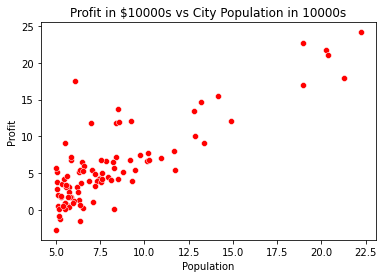

In [41]:
ax = sns.scatterplot(x='Population', y='Profit', data=data,color = 'r')
ax.set_title("Profit in $10000s vs City Population in 10000s");

### gradient descent 

##### To perform dot product the X and theta should satisfy matrix mult property

In [42]:
def h(X, theta):
    return np.dot(X,theta)

In [43]:
def cost_function(X,y,theta):
    m = len(y)
    cost = (1./(2*m))*np.sum(np.square(h(X,theta)-y))
    return cost

In [44]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)


In [45]:
X.shape

(97, 2)

In [46]:
y.shape

(97, 1)

In [47]:
theta = np.zeros((2,1))

cost_function(X, y, theta)

32.072733877455676

In [48]:
theta.shape

(2, 1)

#####  Cost function and updation at gradient descent 

In [49]:
def gradient(X,y,theta,alpha,iterations):
    
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = h(X,theta)
        
        theta -= alpha*1/m*np.dot(X.T,(y_pred-y))
        costs.append(cost_function(X,y,theta))
       
       
    return theta, costs
      

In [50]:
iterations = 1000
alpha = 0.01


In [51]:
theta,costs= gradient(X,y,theta,alpha,iterations)

In [52]:
print("h(x) = {} + {}x".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.24 + 1.13x


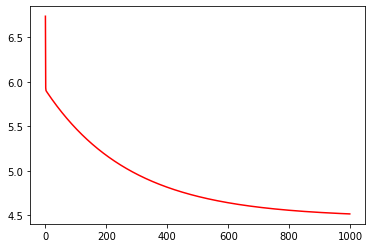

In [53]:
plt.plot(costs,color='r')

#### Linear Regression fit 

/home/nishant/notebook/jupyterenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression')

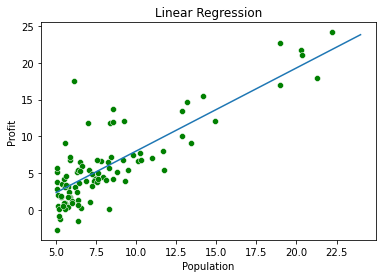

In [55]:
theta = np.squeeze(theta)

sns.scatterplot(x = "Population", y = "Profit", data = data,color = 'g')

x1 = [i for i in range(5,25)]
y1 = [(x*theta[1]+theta[0]) for x in x1]
sns.lineplot(x1,y1)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear Regression")

In [56]:
def predict(X, theta):
    y_pred = np.dot(X,theta.T)
    return y_pred